In [11]:
# Generate exponential distributed random variables given the mean and number of random variables

from scipy.stats import uniform, expon
import numpy as np
import matplotlib.pyplot as plt

def exponential_inverse_trans(n=1,mean=1):
    U=uniform.rvs(size=n)
    X=-mean*np.log(1-U)
    actual=expon.rvs(size=n,scale=mean)
    
    plt.figure(figsize=(12,9))
    plt.hist(X, bins=50, alpha=0.5, label="Generated r.v.")
    plt.hist(actual, bins=50, alpha=0.5, label="Actual r.v.")
    plt.title("Generated vs Actual %i Exponential Random Variables" %n)
    plt.legend()
    plt.show()
    return X

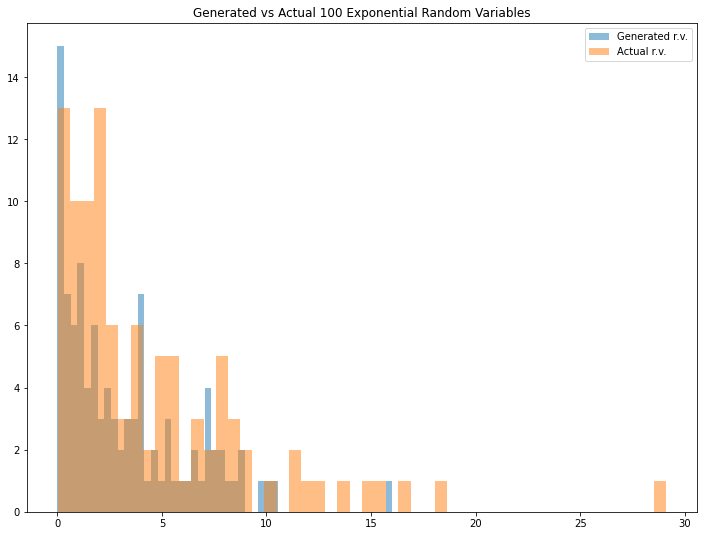

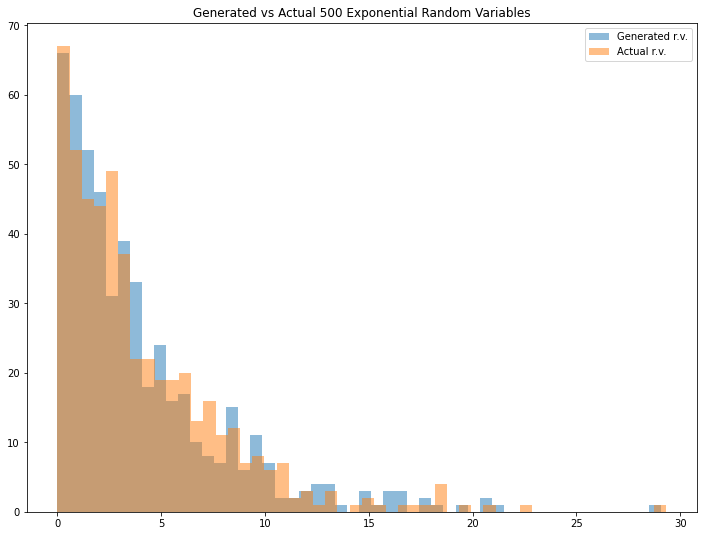

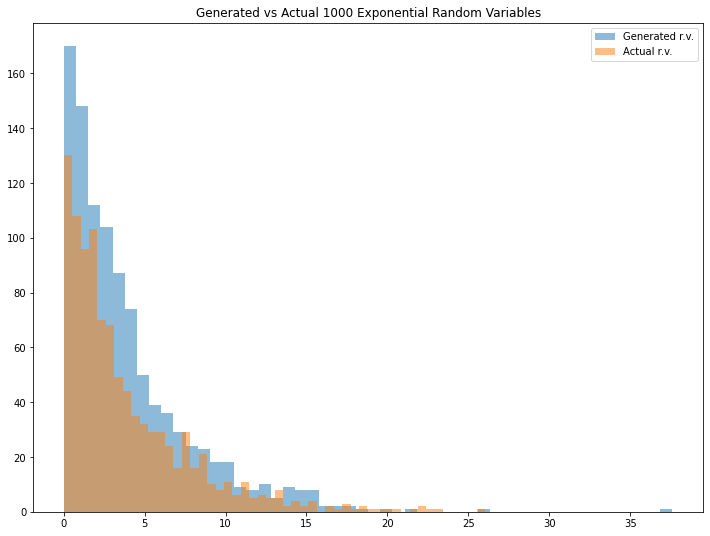

In [12]:
cont_example1=exponential_inverse_trans(n=100,mean=4)
cont_example2=exponential_inverse_trans(n=500,mean=4)
cont_example3=exponential_inverse_trans(n=1000,mean=4)

In [17]:
# Generate arbitary discrete distributed random variables given the probability vector

import pandas as pd

def discrete_inverse_trans(prob_vec):
    U=uniform.rvs(size=1)
    if U<=prob_vec[0]:
        return 1
    else:
        for i in range(1,len(prob_vec)+1):
            if sum(prob_vec[0:i])<U and sum(prob_vec[0:i+1])>U:
                return i+1

In [18]:
def discrete_samples(prob_vec,n=1):
    sample=[]
    for i in range(0,n):
        sample.append(discrete_inverse_trans(prob_vec))
    return np.array(sample)

In [19]:
def discrete_simulate(prob_vec,numbers,n=1):
    sample_disc=discrete_samples(prob_vec,n)
    unique, counts=np.unique(sample_disc,return_counts=True)
    
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    prob=counts/n
    ax.bar(numbers,prob)
    ax.set_title("Simulation of Generating %i Discrete Random Variables" %n)
    plt.show()
    
    data={'X':unique,'Number of samples':counts,'Empirical Probability':prob,'Actual Probability':prob_vec}
    df=pd.DataFrame(data=data)
    return df

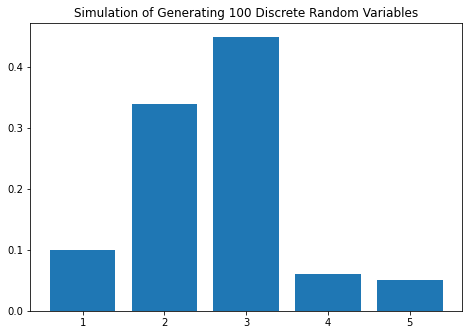

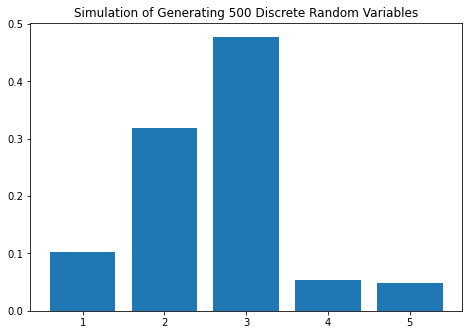

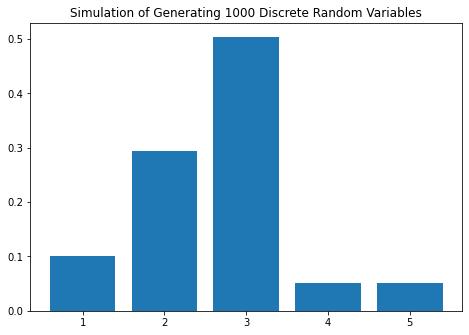

In [20]:
prob_vec=np.array([0.1,0.3,0.5,0.05,0.05])
numbers=np.array([1,2,3,4,5])
dis_example1=discrete_simulate(prob_vec, numbers, n=100)
dis_example2=discrete_simulate(prob_vec, numbers, n=500)
dis_example3=discrete_simulate(prob_vec, numbers, n=1000)